In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from scipy import stats

# Cargar el archivo actualizado
data_updated = pd.read_csv('Barcelona_rent_price_updated.csv')

# Mostrar información del conjunto de datos
print(data_updated.info())

# Mostrar estadísticas descriptivas
print(data_updated.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2311 non-null   int64  
 1   Trimester           2311 non-null   int64  
 2   District            2311 non-null   object 
 3   Neighbourhood       2311 non-null   object 
 4   Price (euro/month)  2311 non-null   float64
 5   Price (euro/m2)     2311 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 108.5+ KB
None
              Year    Trimester  Price (euro/month)  Price (euro/m2)
count  2311.000000  2311.000000         2311.000000      2311.000000
mean   2017.745565     2.440502          820.780658        12.569469
std       2.463095     1.116498          255.450568         2.750275
min    2014.000000     1.000000          142.340000         3.180000
25%    2016.000000     1.000000          653.860000        10.600000
50%    2018.000000 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


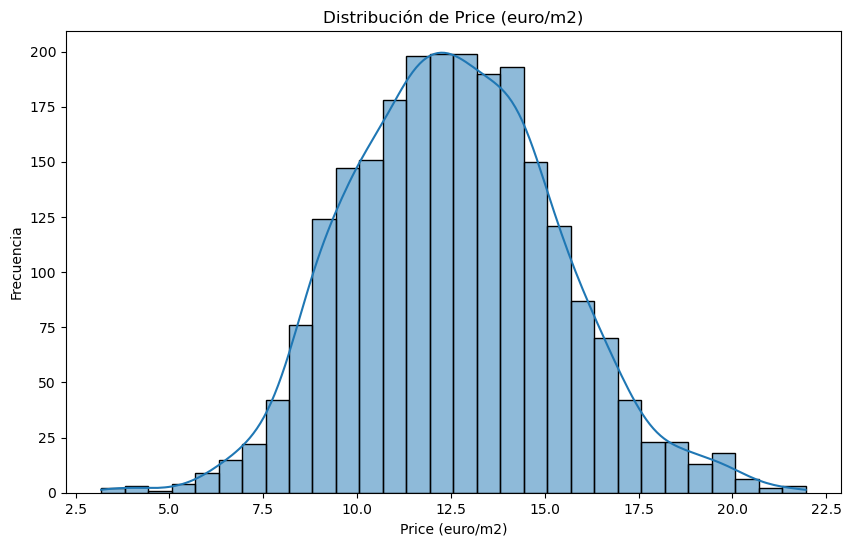

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


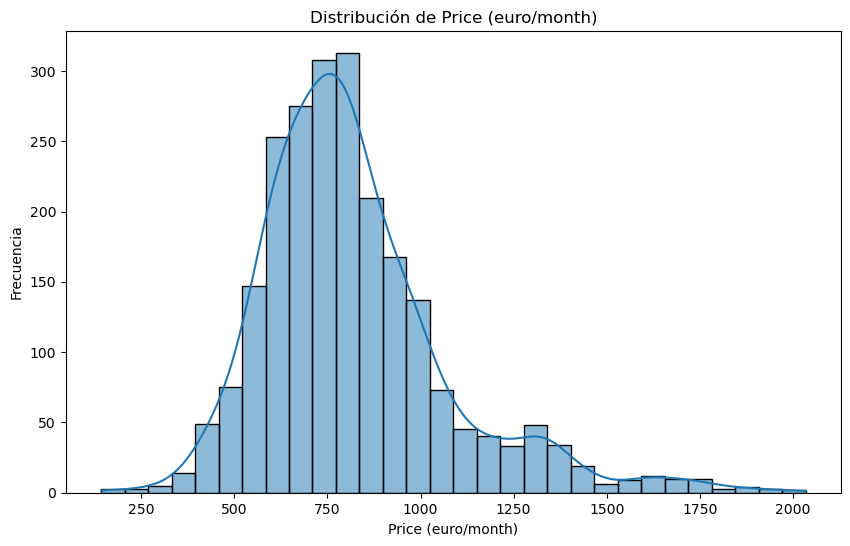

In [12]:
# Visualizar la distribución de la variable Price (euro/m2)
plt.figure(figsize=(10, 6))
sns.histplot(data_updated['Price (euro/m2)'], kde=True, bins=30)
plt.title('Distribución de Price (euro/m2)')
plt.xlabel('Price (euro/m2)')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución de la variable Price (euro/month)
plt.figure(figsize=(10, 6))
sns.histplot(data_updated['Price (euro/month)'], kde=True, bins=30)
plt.title('Distribución de Price (euro/month)')
plt.xlabel('Price (euro/month)')
plt.ylabel('Frecuencia')
plt.show()




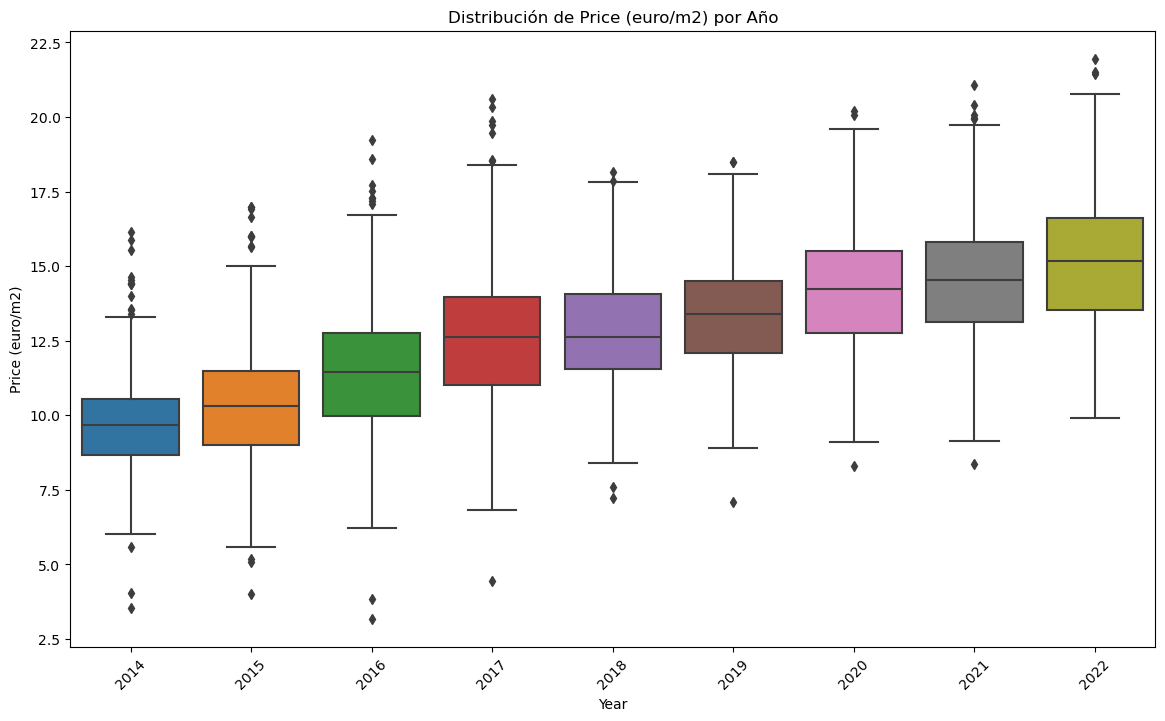

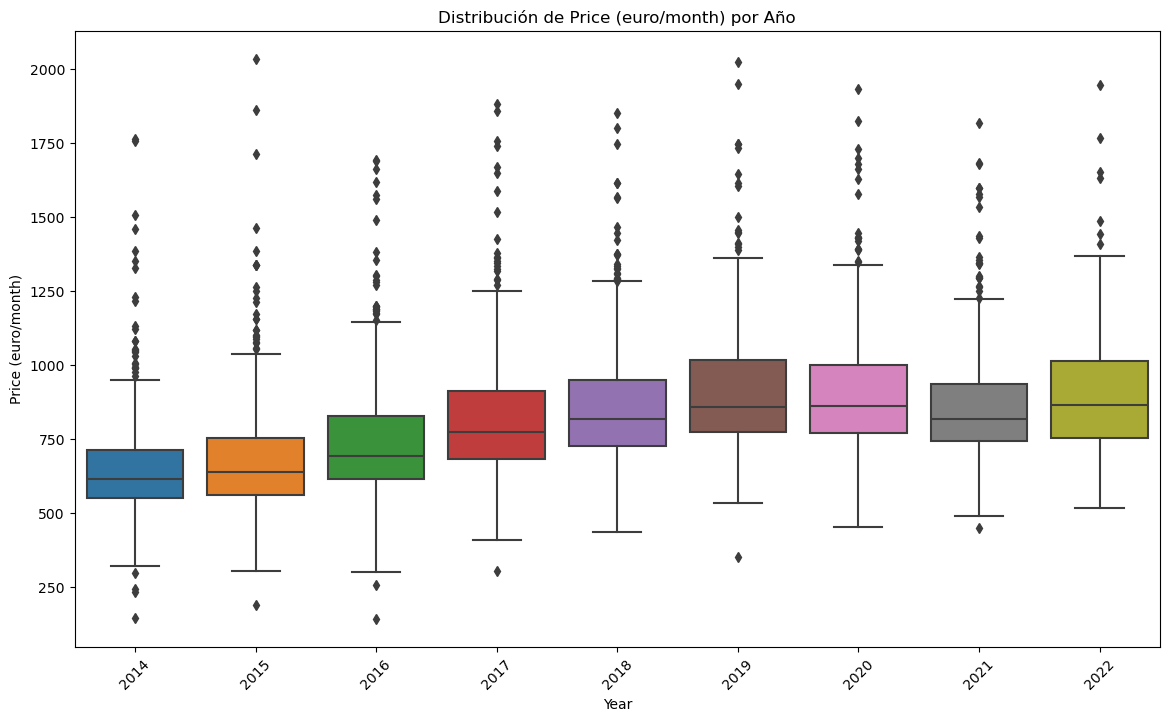

In [13]:
# Visualizar la distribución de precios por año para Price (euro/m2)
plt.figure(figsize=(14, 8))
sns.boxplot(x='Year', y='Price (euro/m2)', data=data_updated)
plt.title('Distribución de Price (euro/m2) por Año')
plt.xlabel('Year')
plt.ylabel('Price (euro/m2)')
plt.xticks(rotation=45)
plt.show()

# Visualizar la distribución de precios por año para Price (euro/month)
plt.figure(figsize=(14, 8))
sns.boxplot(x='Year', y='Price (euro/month)', data=data_updated)
plt.title('Distribución de Price (euro/month) por Año')
plt.xlabel('Year')
plt.ylabel('Price (euro/month)')
plt.xticks(rotation=45)
plt.show()



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


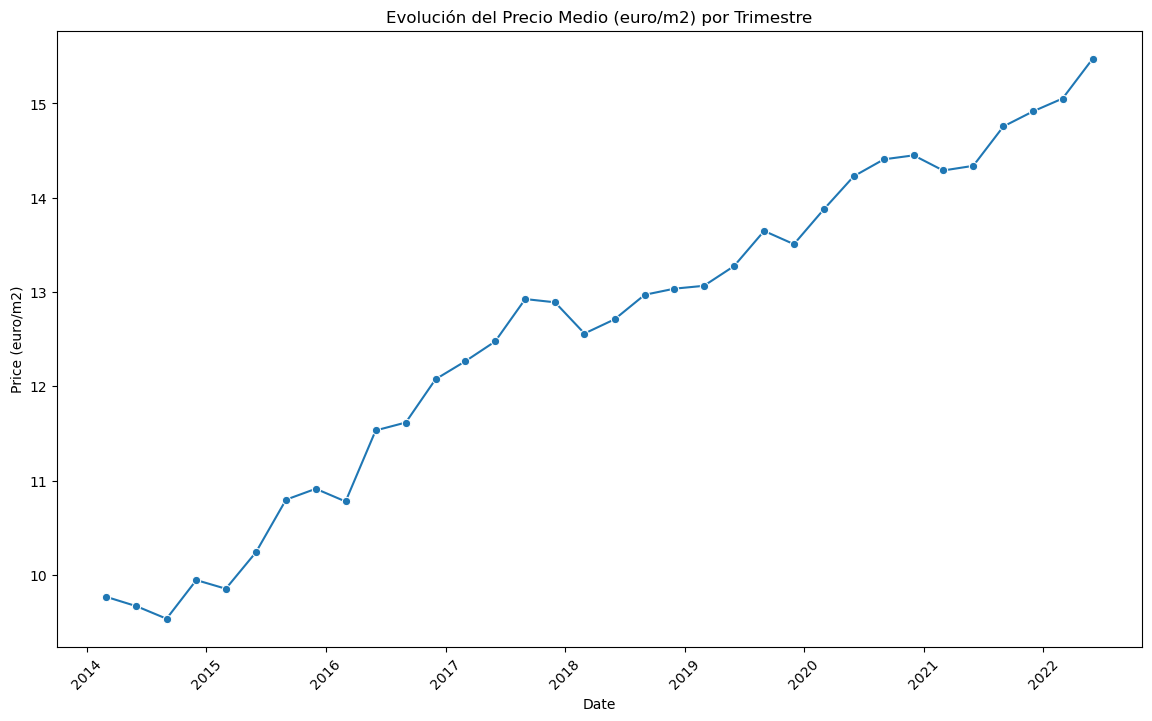

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


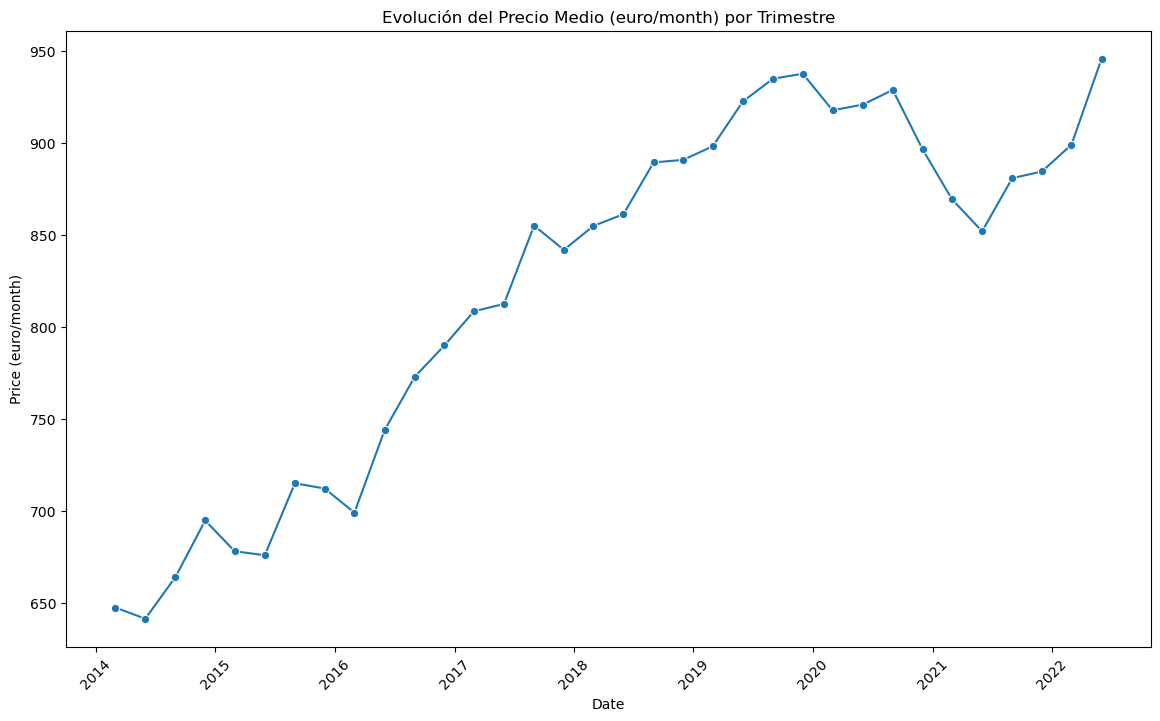

In [14]:
# Visualizar la serie temporal del precio medio por trimestre para Price (euro/m2)
data_updated['Date'] = pd.to_datetime(data_updated['Year'].astype(str) + '-' + (data_updated['Trimester'] * 3).astype(str) + '-01')
data_time_series_m2 = data_updated.groupby('Date')['Price (euro/m2)'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Price (euro/m2)', data=data_time_series_m2, marker='o')
plt.title('Evolución del Precio Medio (euro/m2) por Trimestre')
plt.xlabel('Date')
plt.ylabel('Price (euro/m2)')
plt.xticks(rotation=45)
plt.show()

# Visualizar la serie temporal del precio medio por trimestre para Price (euro/month)
data_time_series_month = data_updated.groupby('Date')['Price (euro/month)'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Price (euro/month)', data=data_time_series_month, marker='o')
plt.title('Evolución del Precio Medio (euro/month) por Trimestre')
plt.xlabel('Date')
plt.ylabel('Price (euro/month)')
plt.xticks(rotation=45)
plt.show()




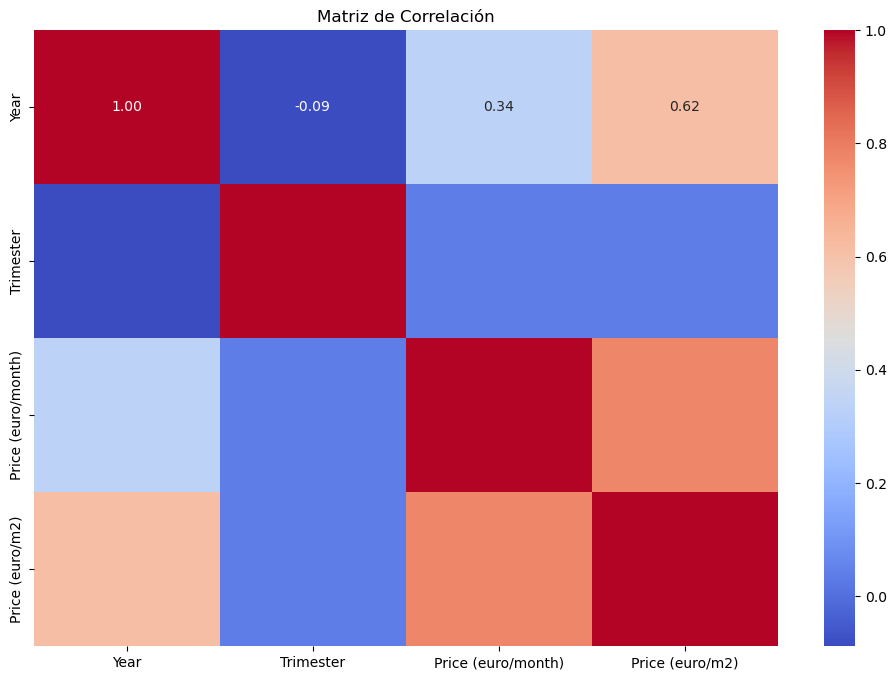

In [15]:
# Análisis de correlación
numeric_columns = data_updated.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()




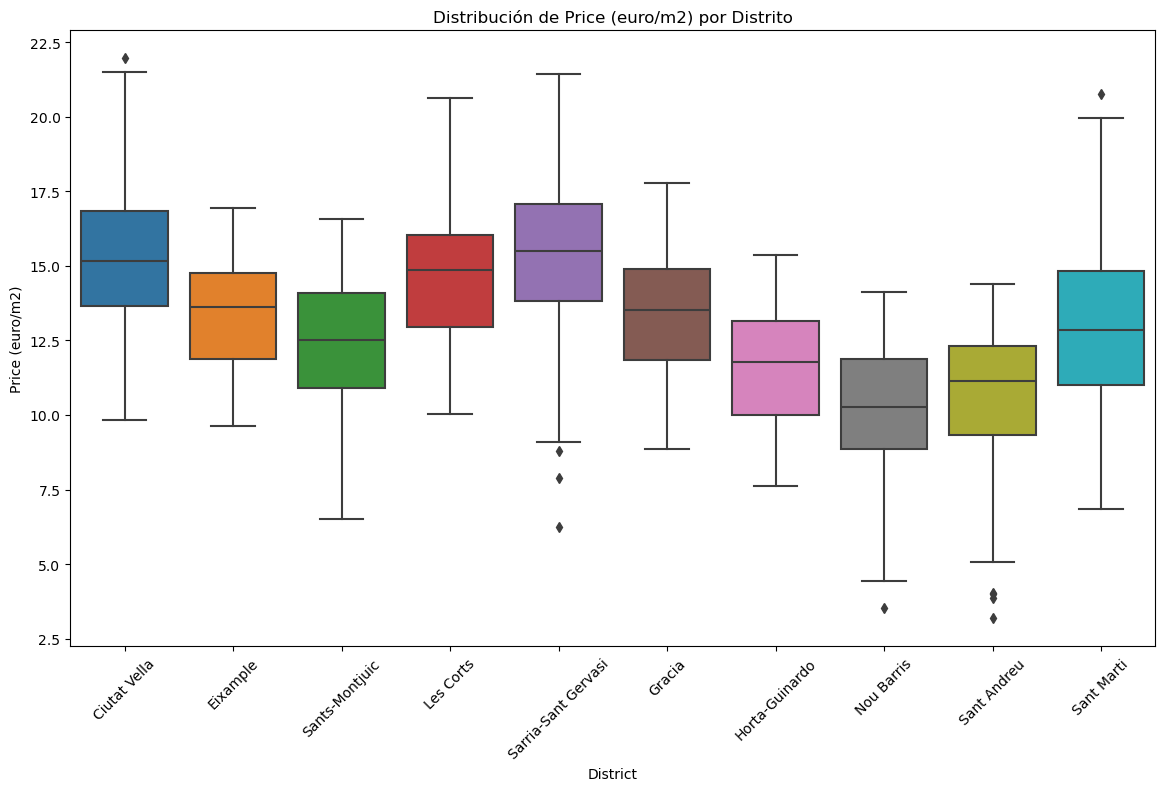

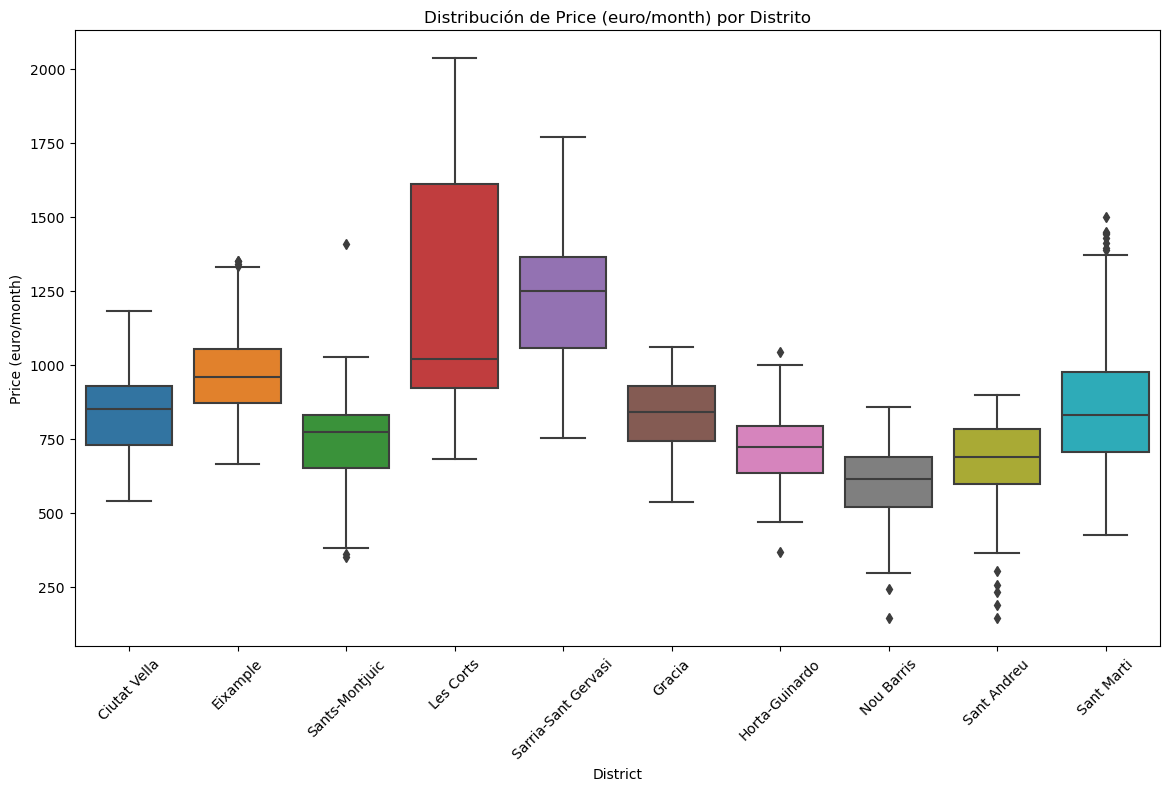

In [16]:
# Visualizar la distribución de precios por distrito para Price (euro/m2)
plt.figure(figsize=(14, 8))
sns.boxplot(x='District', y='Price (euro/m2)', data=data_updated)
plt.title('Distribución de Price (euro/m2) por Distrito')
plt.xlabel('District')
plt.ylabel('Price (euro/m2)')
plt.xticks(rotation=45)
plt.show()

# Visualizar la distribución de precios por distrito para Price (euro/month)
plt.figure(figsize=(14, 8))
sns.boxplot(x='District', y='Price (euro/month)', data=data_updated)
plt.title('Distribución de Price (euro/month) por Distrito')
plt.xlabel('District')
plt.ylabel('Price (euro/month)')
plt.xticks(rotation=45)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

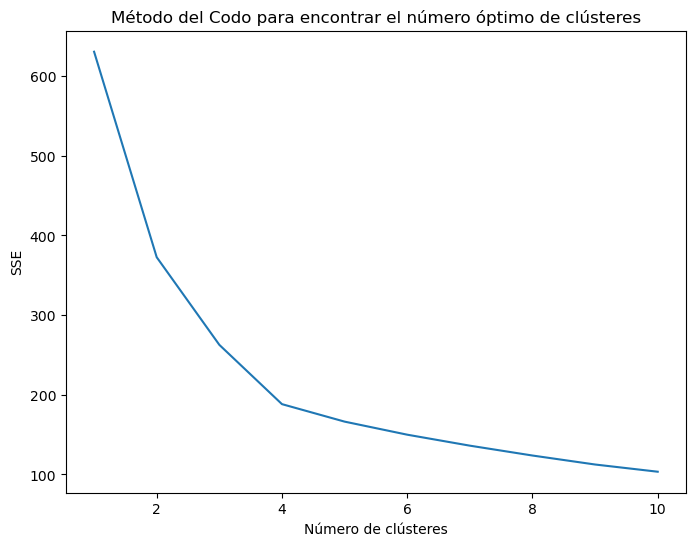

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


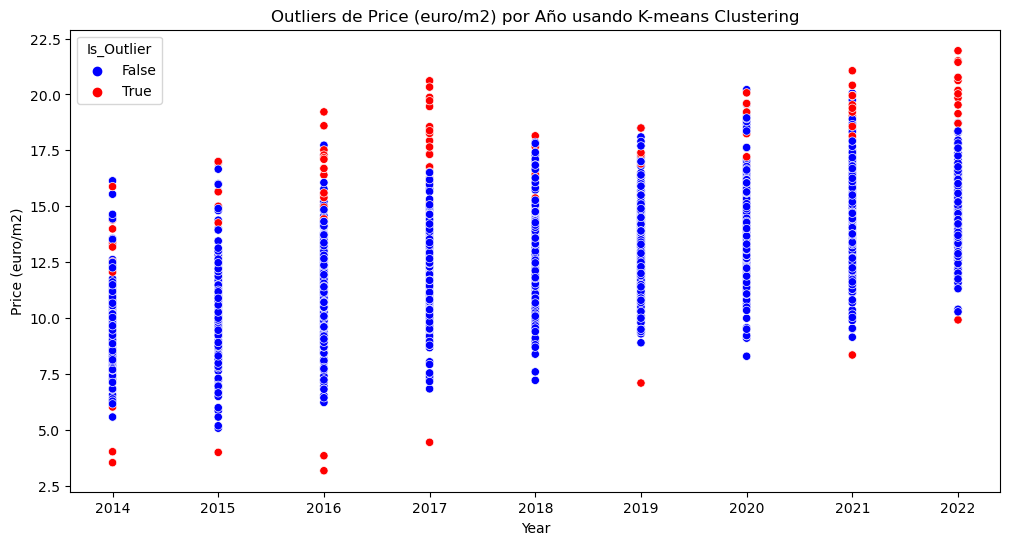

In [17]:
# Identificar y corregir outliers utilizando K-means clustering
numeric_data = data_updated.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(numeric_data)

# Calcular SSE para diferentes valores de k
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse[k] = kmeans.inertia_

# Graficar SSE vs. k para encontrar el número óptimo de clústeres
plt.figure(figsize=(8, 6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clústeres")
plt.ylabel("SSE")
plt.title("Método del Codo para encontrar el número óptimo de clústeres")
plt.show()

# Aplicar K-means clustering con 4 clústeres (según el gráfico del codo)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data_updated['Cluster'] = clusters
data_updated['Distance_to_Centroid'] = np.linalg.norm(data_scaled - kmeans.cluster_centers_[clusters], axis=1)
threshold = data_updated['Distance_to_Centroid'].quantile(0.95)
data_updated['Is_Outlier'] = data_updated['Distance_to_Centroid'] > threshold

# Eliminar outliers
data_clean = data_updated[~data_updated['Is_Outlier']]

# Visualizar los outliers eliminados
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_updated, x='Year', y='Price (euro/m2)', hue='Is_Outlier', palette={True: 'red', False: 'blue'})
plt.title('Outliers de Price (euro/m2) por Año usando K-means Clustering')
plt.show()



In [18]:
# Binarización de variables categóricas
data_encoded = pd.get_dummies(data_clean, columns=['District', 'Neighbourhood'])




In [19]:
# Aplicar transformación logarítmica a ambas variables objetivo
data_encoded['log_Price (euro/m2)'] = np.log1p(data_encoded['Price (euro/m2)'])
data_encoded['log_Price (euro/month)'] = np.log1p(data_encoded['Price (euro/month)'])



In [20]:
# División en características (X) y variables objetivo transformadas (y_m2 y y_month)
X = data_encoded.drop(['Price (euro/m2)', 'log_Price (euro/m2)', 'Price (euro/month)', 'log_Price (euro/month)', 'Date'], axis=1)
y_m2 = data_encoded['log_Price (euro/m2)']
y_month = data_encoded['log_Price (euro/month)']



In [21]:
# Escalado de los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



In [22]:
# División en conjuntos de entrenamiento y prueba para ambas variables objetivo
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_scaled, y_m2, test_size=0.2, random_state=42)
X_train_month, X_test_month, y_train_month, y_test_month = train_test_split(X_scaled, y_month, test_size=0.2, random_state=42)


In [23]:
# Entrenar y evaluar el modelo Ridge para Price (euro/m2)
ridge_model_m2 = Ridge(alpha=1.0)
ridge_model_m2.fit(X_train_m2, y_train_m2)
y_pred_log_m2 = ridge_model_m2.predict(X_test_m2)
y_pred_m2 = np.expm1(y_pred_log_m2)  # Deshacer la transformación logarítmica
y_test_exp_m2 = np.expm1(y_test_m2)

mae_m2 = mean_absolute_error(y_test_exp_m2, y_pred_m2)
mse_m2 = mean_squared_error(y_test_exp_m2, y_pred_m2)
rmse_m2 = np.sqrt(mse_m2)
r2_m2 = r2_score(y_test_exp_m2, y_pred_m2)

print(f'Price (euro/m2) - MAE: {mae_m2}, MSE: {mse_m2}, RMSE: {rmse_m2}, R²: {r2_m2}')

# Validación cruzada con KFold para Price (euro/m2)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_m2 = cross_val_score(ridge_model_m2, X_train_m2, y_train_m2, cv=kf, scoring='r2', n_jobs=-1)
print(f'Price (euro/m2) - Validación cruzada R²: {scores_m2.mean()}, {scores_m2.std()}')



Price (euro/m2) - MAE: 0.4594534772448738, MSE: 0.36858901136417416, RMSE: 0.6071153196586083, R²: 0.9440063761832949
Price (euro/m2) - Validación cruzada R²: 0.9257207163008297, 0.00921761638814432


In [24]:
# Entrenar y evaluar el modelo Ridge para Price (euro/month)
ridge_model_month = Ridge(alpha=1.0)
ridge_model_month.fit(X_train_month, y_train_month)
y_pred_log_month = ridge_model_month.predict(X_test_month)
y_pred_month = np.expm1(y_pred_log_month)  # Deshacer la transformación logarítmica
y_test_exp_month = np.expm1(y_test_month)

mae_month = mean_absolute_error(y_test_exp_month, y_pred_month)
mse_month = mean_squared_error(y_test_exp_month, y_pred_month)
rmse_month = np.sqrt(mse_month)
r2_month = r2_score(y_test_exp_month, y_pred_month)

print(f'Price (euro/month) - MAE: {mae_month}, MSE: {mse_month}, RMSE: {rmse_month}, R²: {r2_month}')

# Validación cruzada con KFold para Price (euro/month)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_month = cross_val_score(ridge_model_month, X_train_month, y_train_month, cv=kf, scoring='r2', n_jobs=-1)
print(f'Price (euro/month) - Validación cruzada R²: {scores_month.mean()}, {scores_month.std()}')


Price (euro/month) - MAE: 48.995374177329715, MSE: 4430.829879621476, RMSE: 66.56447911327389, R²: 0.9002916859612925
Price (euro/month) - Validación cruzada R²: 0.8939557056686407, 0.011127761580973701


In [25]:
# Crear un dataframe con los años 2023 a 2026, todos los trimestres, distritos y barrios
years = [2023, 2024, 2025, 2026]
trimesters = [1, 2, 3, 4]
districts = data_updated['District'].unique()
neighbourhoods = data_updated['Neighbourhood'].unique()
new_data = pd.DataFrame([(year, trimester, district, neighbourhood)
                         for year in years
                         for trimester in trimesters
                         for district in districts
                         for neighbourhood in neighbourhoods],
                        columns=['Year', 'Trimester', 'District', 'Neighbourhood'])

# Codificación de variables categóricas en los nuevos datos
new_data_encoded = pd.get_dummies(new_data, columns=['District', 'Neighbourhood'])

# Asegurarnos de que todas las columnas de características estén presentes
missing_cols = set(X.columns) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = 0
new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

# Escalar las nuevas características usando el mismo escalador que se usó para el entrenamiento
new_data_scaled = scaler.transform(new_data_encoded)

# Realizar la predicción con el modelo para Price (euro/m2)
predictions_log_m2 = ridge_model_m2.predict(new_data_scaled)
predictions_m2 = np.expm1(predictions_log_m2)  # Deshacer la transformación logarítmica

# Realizar la predicción con el modelo para Price (euro/month)
predictions_log_month = ridge_model_month.predict(new_data_scaled)
predictions_month = np.expm1(predictions_log_month)  # Deshacer la transformación logarítmica

# Agregar las predicciones al DataFrame
new_data['Predicted Price (euro/m2)'] = predictions_m2
new_data['Predicted Price (euro/month)'] = predictions_month

# Guardar las predicciones en un archivo CSV
new_data.to_csv('predictions_2023_2026.csv', index=False)

# Mostrar las predicciones
print(new_data[['Year', 'Trimester', 'District', 'Neighbourhood', 'Predicted Price (euro/m2)', 'Predicted Price (euro/month)']])



       Year  Trimester      District                          Neighbourhood  \
0      2023          1  Ciutat Vella                               el Raval   
1      2023          1  Ciutat Vella                         Gothic Quarter   
2      2023          1  Ciutat Vella                         la Barceloneta   
3      2023          1  Ciutat Vella  Sant Pere, Santa Caterina i la Ribera   
4      2023          1  Ciutat Vella                             Fort Pienc   
...     ...        ...           ...                                    ...   
11995  2026          4    Sant Marti             la Marina del Prat Vermell   
11996  2026          4    Sant Marti                               Vallbona   
11997  2026          4    Sant Marti                               la Clota   
11998  2026          4    Sant Marti                     la Sagrada Familia   
11999  2026          4    Sant Marti               Sant Martíide Provencals   

       Predicted Price (euro/m2)  Predicted Price (

Index(['Year', 'Trimester', 'District', 'Neighbourhood', 'Price (euro/month)',
       'Price (euro/m2)'],
      dtype='object')
Index(['Year', 'Trimester', 'District', 'Neighbourhood',
       'Predicted Price (euro/m2)', 'Predicted Price (euro/month)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14311 entries, 0 to 14310
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                14311 non-null  int64  
 1   Trimester           14311 non-null  int64  
 2   District            14311 non-null  object 
 3   Neighbourhood       14311 non-null  object 
 4   Price (euro/month)  14311 non-null  float64
 5   Price (euro/m2)     14311 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 671.0+ KB
None
               Year     Trimester  Price (euro/month)  Price (euro/m2)
count  14311.000000  14311.000000        14311.000000     14311.000000
mean    2023.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


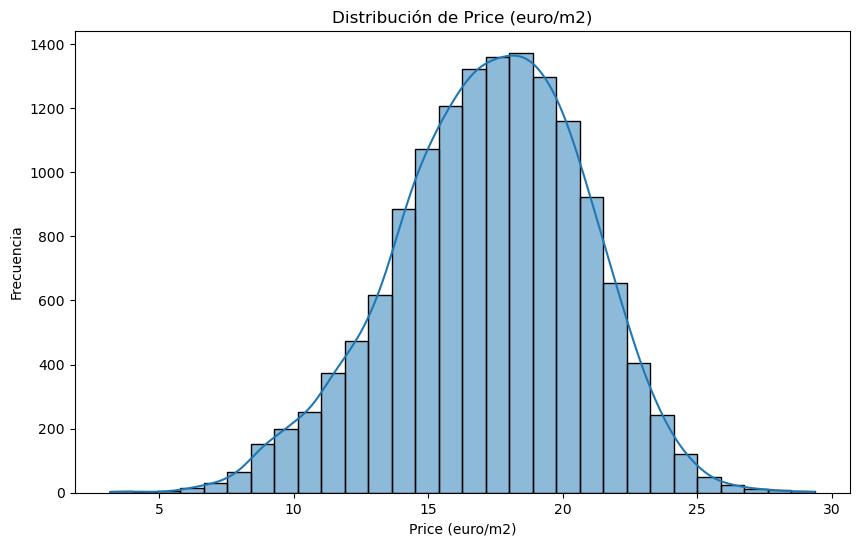

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


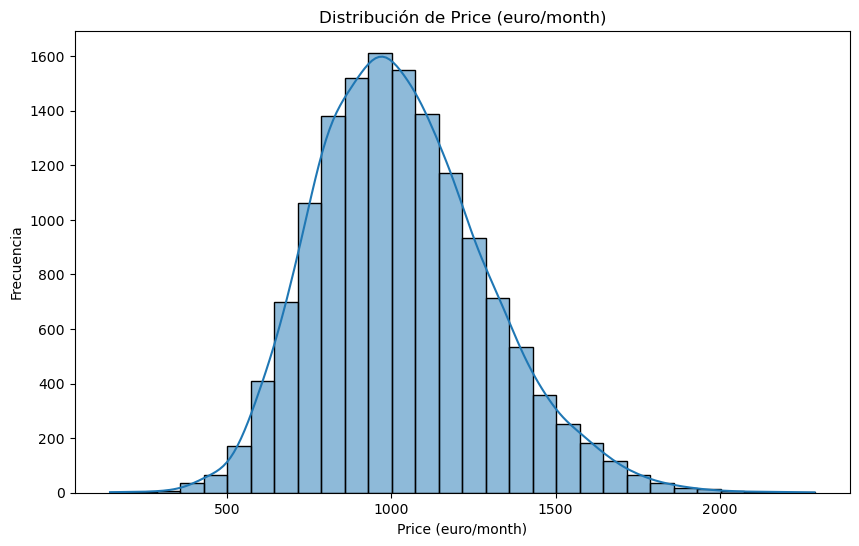

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


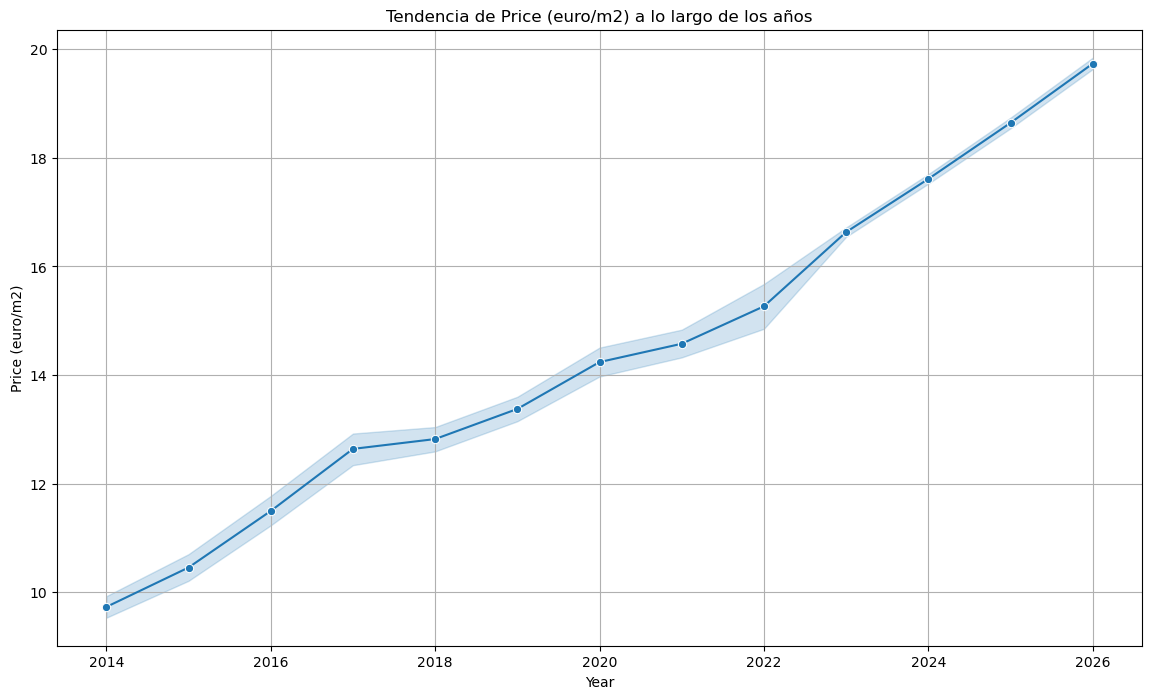

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

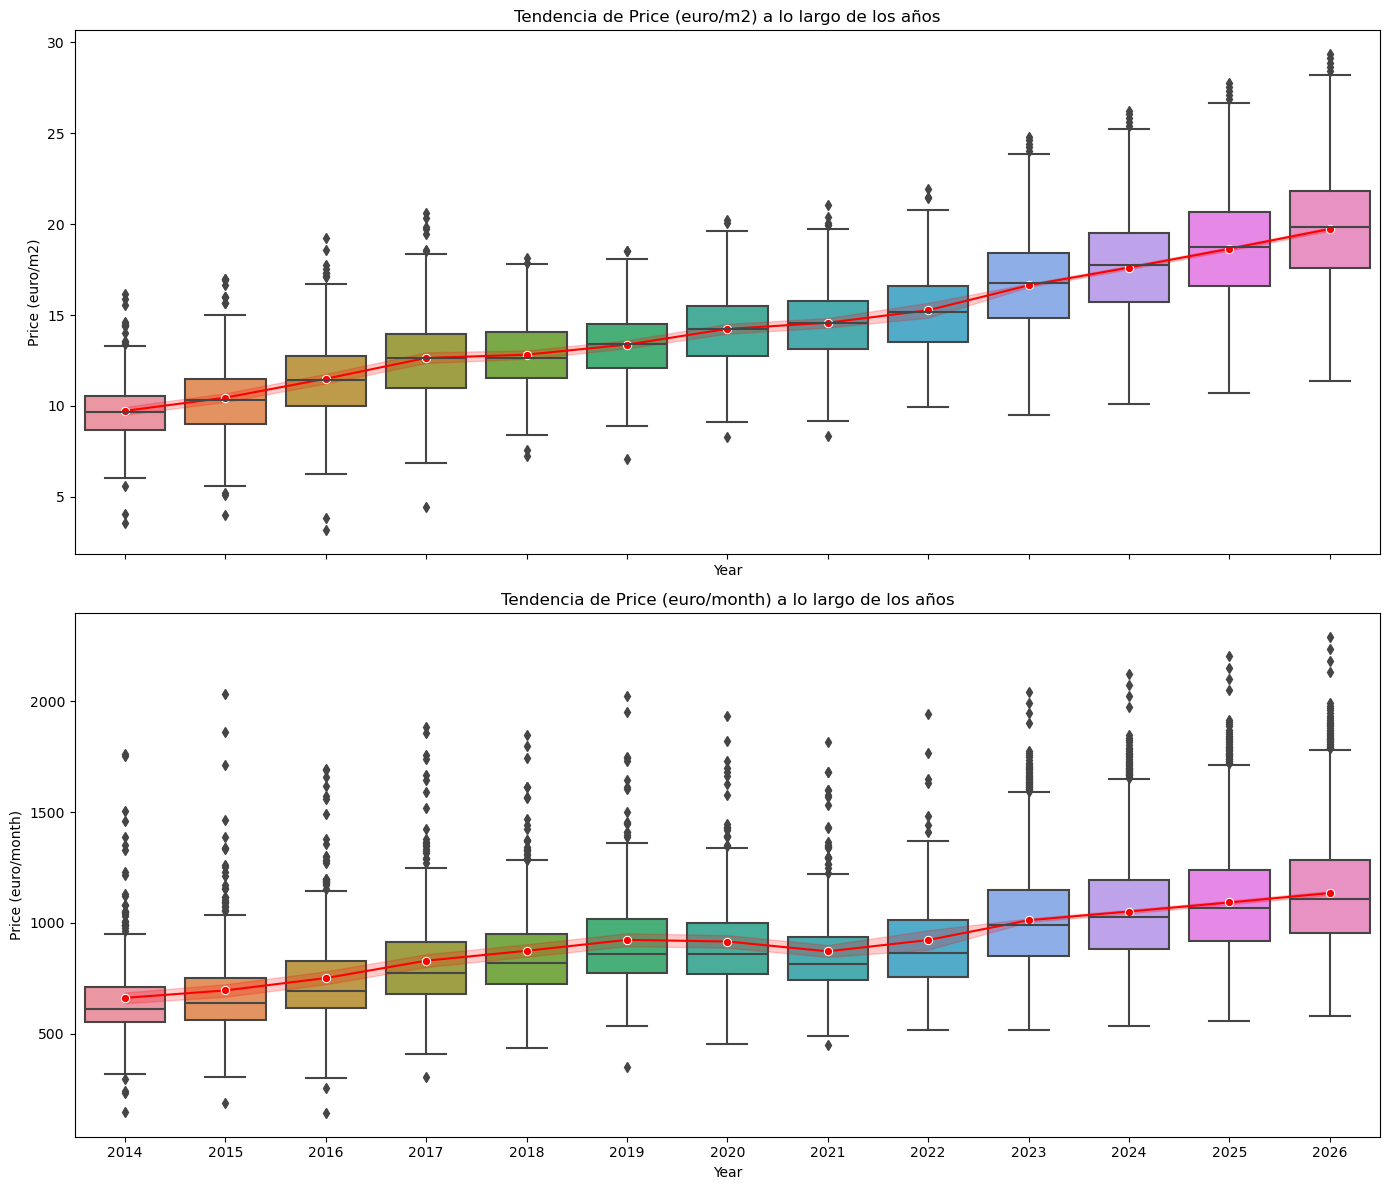

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


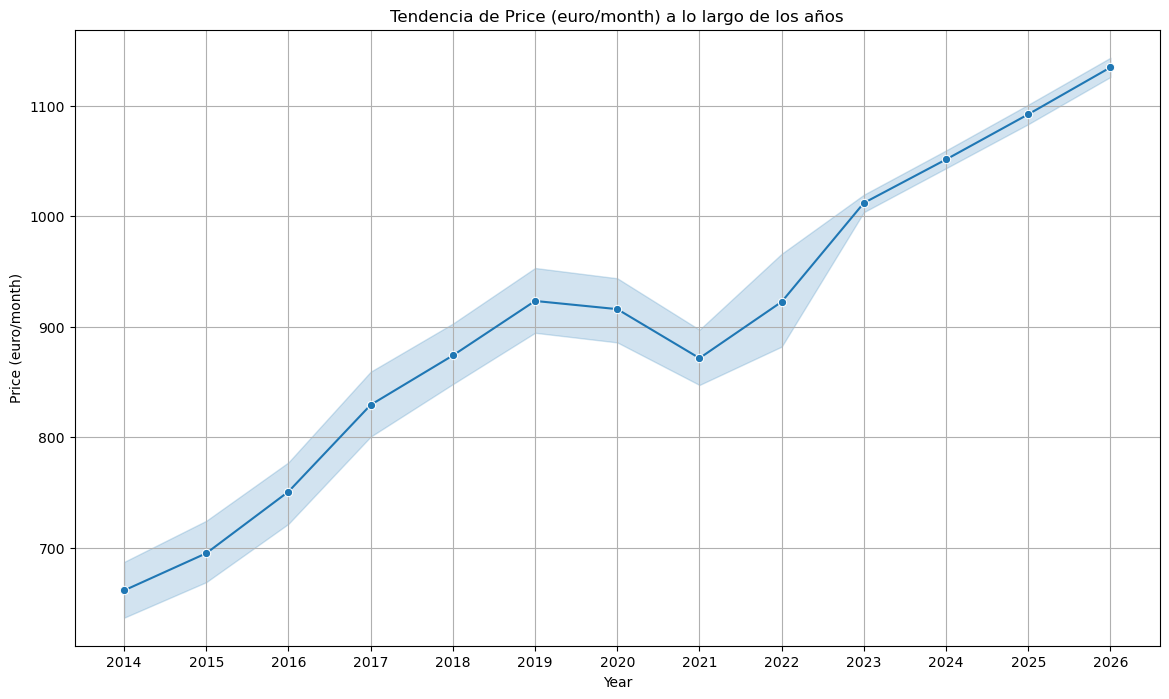

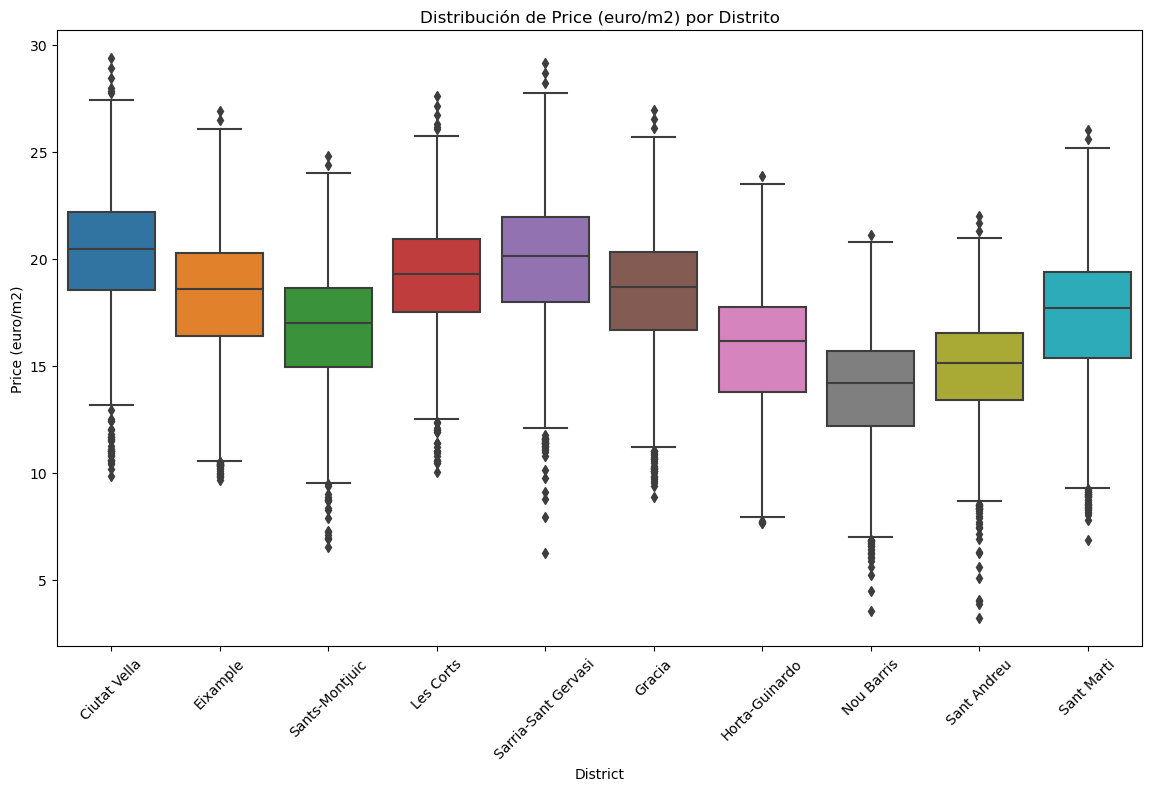

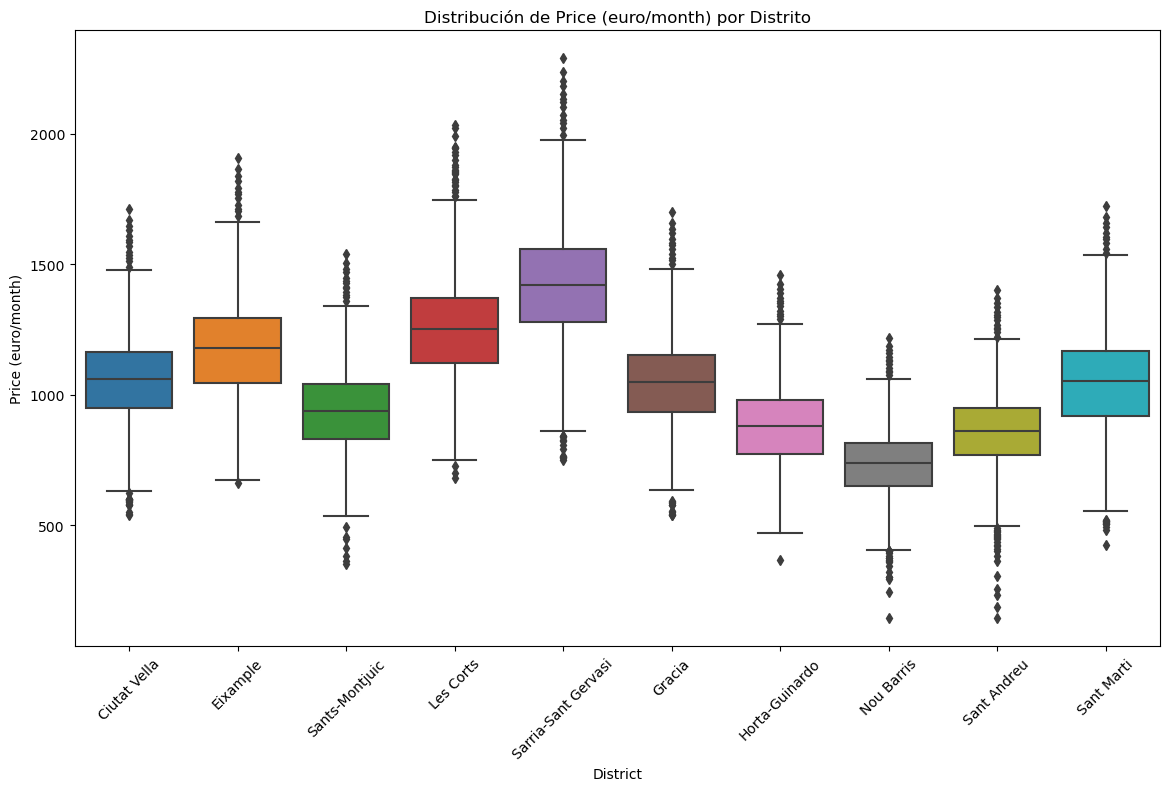

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos CSV
data_updated = pd.read_csv('Barcelona_rent_price_updated.csv')
predictions_2023_2026 = pd.read_csv('predictions_2023_2026.csv')

# Verificar las columnas de cada DataFrame
print(data_updated.columns)
print(predictions_2023_2026.columns)

# Renombrar columnas en predictions_2023_2026 para que coincidan con data_updated
predictions_2023_2026 = predictions_2023_2026.rename(columns={
    'Predicted Price (euro/m2)': 'Price (euro/m2)',
    'Predicted Price (euro/month)': 'Price (euro/month)'
})

# Combinar los DataFrames
data_combined = pd.concat([data_updated, predictions_2023_2026], ignore_index=True)

# Guardar el DataFrame combinado en un archivo CSV
data_combined.to_csv('Barcelona_rent_price_combined_2014_2026.csv', index=False)

# Realizar EDA
# Información básica
print(data_combined.info())
print(data_combined.describe())

# Distribución de Price (euro/m2)
plt.figure(figsize=(10, 6))
sns.histplot(data_combined['Price (euro/m2)'], kde=True, bins=30)
plt.title('Distribución de Price (euro/m2)')
plt.xlabel('Price (euro/m2)')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de Price (euro/month)
plt.figure(figsize=(10, 6))
sns.histplot(data_combined['Price (euro/month)'], kde=True, bins=30)
plt.title('Distribución de Price (euro/month)')
plt.xlabel('Price (euro/month)')
plt.ylabel('Frecuencia')
plt.show()

# Tendencia de Price (euro/m2) a lo largo de los años
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Price (euro/m2)', data=data_combined, marker='o')
plt.title('Tendencia de Price (euro/m2) a lo largo de los años')
plt.xlabel('Year')
plt.ylabel('Price (euro/m2)')
plt.grid(True)
plt.show()

# Tendencia de Price (euro/month) a lo largo de los años
# Convertir la columna 'Year' a string para que se trate como una categoría en el boxplot
data_combined['Year'] = data_combined['Year'].astype(str)

# Crear una figura con subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Tendencia de Price (euro/m2) a lo largo de los años con boxplot
sns.boxplot(x='Year', y='Price (euro/m2)', data=data_combined, ax=axes[0])
sns.lineplot(x='Year', y='Price (euro/m2)', data=data_combined, marker='o', ax=axes[0], color='red')
axes[0].set_title('Tendencia de Price (euro/m2) a lo largo de los años')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Price (euro/m2)')

# Tendencia de Price (euro/month) a lo largo de los años con boxplot
sns.boxplot(x='Year', y='Price (euro/month)', data=data_combined, ax=axes[1])
sns.lineplot(x='Year', y='Price (euro/month)', data=data_combined, marker='o', ax=axes[1], color='red')
axes[1].set_title('Tendencia de Price (euro/month) a lo largo de los años')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Price (euro/month)')

# Ajustar la visualización
plt.tight_layout()
plt.show()
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Price (euro/month)', data=data_combined, marker='o')
plt.title('Tendencia de Price (euro/month) a lo largo de los años')
plt.xlabel('Year')
plt.ylabel('Price (euro/month)')
plt.grid(True)
plt.show()

# Boxplot de Price (euro/m2) por distrito
plt.figure(figsize=(14, 8))
sns.boxplot(x='District', y='Price (euro/m2)', data=data_combined)
plt.title('Distribución de Price (euro/m2) por Distrito')
plt.xlabel('District')
plt.ylabel('Price (euro/m2)')
plt.xticks(rotation=45)
plt.show()

# Boxplot de Price (euro/month) por distrito
plt.figure(figsize=(14, 8))
sns.boxplot(x='District', y='Price (euro/month)', data=data_combined)
plt.title('Distribución de Price (euro/month) por Distrito')
plt.xlabel('District')
plt.ylabel('Price (euro/month)')
plt.xticks(rotation=45)
plt.show()


